We here give a numerical simulation for the following nonlinear second-order differential equation:


\begin{equation}
\ddot{x} + \delta \dot{x} + \alpha x + \beta x^{3} = \gamma\cos{\omega t},
\end{equation}


which is known as the equation of motion for the __*Duffing Oscillator*__

In [1]:
import ODE_functions as DE
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## Set parameters
## Define the physical parameters

alpha = 0.1
beta = 0
gamma = -0.1
delta = 0
omega = 1.2

alpha = 1
beta = 5
gamma = 8
delta = 0.02
omega = 0.5



T_drive = np.pi*2/omega
## Set simulation parameters
# Define the timestep
dt = 0.02*T_drive
# Define the total time of the simulation
total_osc = 500000
t_tot = total_osc*T_drive # sec

## Give initial values
x_init = 0 # m
v_init = 0 # m/s




In [22]:
f = DE.f_duffing_osc(alpha,beta,gamma,delta,omega)

y_all, t_vect = DE.solveDE_RK4(f, y_init = [x_init, v_init], dt = dt, nr_of_DE = 2, t_tot = t_tot)
#y_all, t_vect = DE.solveDE_Euler(f, y_init = [x_init, v_init], dt = dt, nr_of_DE = 2, t_tot = t_tot)

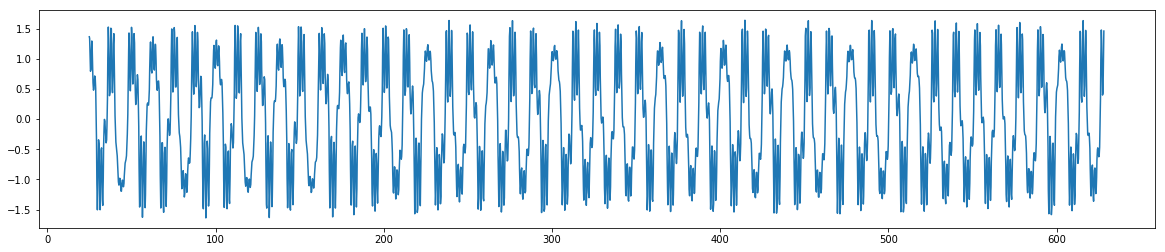

In [23]:
plot_offset_time = 2*T_drive
plot_cutoff_time = 10*T_drive
plot_offset = np.int(plot_offset_time/dt)
plot_cutoff = np.int(plot_cutoff_time/dt)
fig1 = plt.figure(figsize = (20,4))
plt.plot(t_vect[plot_offset:plot_cutoff],y_all[0,plot_offset:plot_cutoff])
#plt.plot(t_vect,y_all_Eu[0,:])

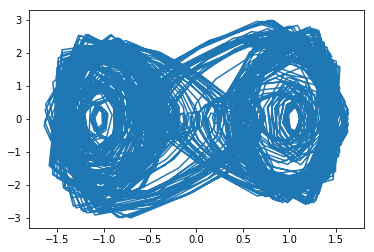

In [24]:
plt.plot(y_all[0,plot_offset:plot_cutoff],y_all[1,plot_offset:plot_cutoff])
#plt.plot(y_all_Eu[0,:],y_all_Eu[1,:])

In [25]:
poincareplot_offset = 2 # Number of driving periods after to start keeping track
n_subplots = 8
poincarephases = [x/n_subplots for x in range(n_subplots)]
poincare_points_x = []
poincare_points_v = []
for poincarephase in poincarephases:
    poincare_points_x.append([y_all[0,int((x+poincarephase)*T_drive/dt)] for x in range(poincareplot_offset,total_osc)])
    poincare_points_v.append([y_all[1,int((x+poincarephase)*T_drive/dt)] for x in range(poincareplot_offset,total_osc)])

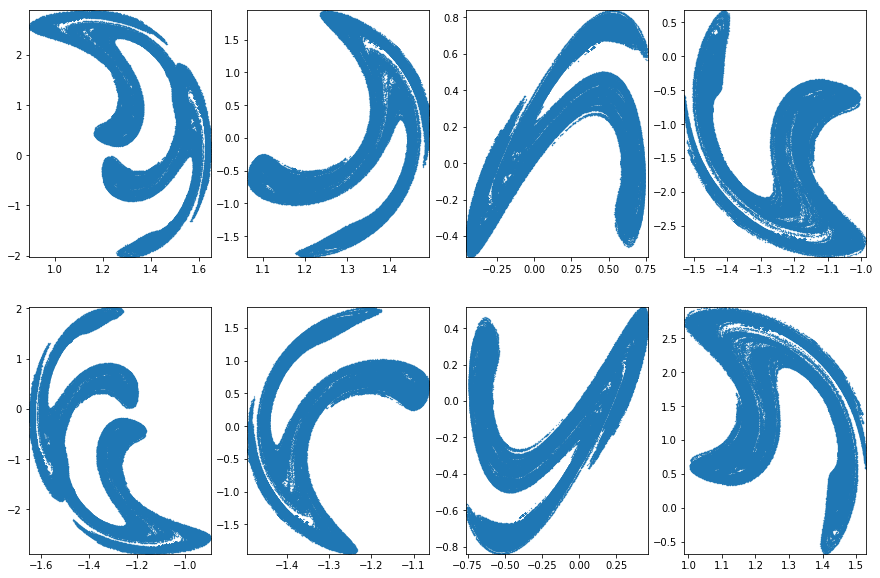

In [26]:
fig1 = plt.figure(figsize = (15,10))
for i in range(n_subplots):
    xlim = [min(poincare_points_x[i]), max(poincare_points_x[i])]
    ylim = [min(poincare_points_v[i]), max(poincare_points_v[i])]
    ax = fig1.add_subplot(2,4,i+1,xlim=xlim,ylim=ylim)
    plt.scatter(poincare_points_x[i],poincare_points_v[i],s = 0.05, marker = 'o')

In [19]:
i = 0
xlim = [1.2*min(poincare_points_x[i]), 1.1*max(poincare_points_x[i])]
min(poincare_points_x[i])

0.8928623692999629

In [65]:
def get_poincare(y_all,phase,offset,cutoff):
    '''
    Helper funtions to get a poincare intersection. Returns x and y coordinates as vectors. Choose the phase of the intersection.
    Only elements after offset and before cutoff will be taken.
    '''
    x = [y_all[0,int((x+phase)*T_drive/dt)] for x in range(offset,cutoff)]
    v = [y_all[1,int((x+phase)*T_drive/dt)] for x in range(offset,cutoff)]
    return x,v

def draw_poincare(fig,x,v,phase = 0,xlim=[-2,2],ylim=[-1.5,1.5]):
    '''
    Helper funtion to draw one poincare intersection.
    '''
    ax = fig1.add_subplot(1,1,1,xlim,ylim)
    plt.scatter(x,v,s = 0.05, marker = 'o')
    return x,v

def draw_poincare_subplot(fig,x,v,nrow,ncol,index,phase = 0, xlim=[2,2],ylim=[-1.5,1.5]):
    '''
    Helper funtion to draw multiple poincare sections in subplots, e.g. with different phases.
    '''
    ax = fig1.add_subplot(nrow,ncol,index,xlim,ylim)
    plt.scatter(x,v,s = 0.05, marker = 'o')
    return x,v



100.0